In [1]:
import numpy as np
import pandas as pd
import os 
import cv2
import matplotlib.pyplot as plt


In [2]:
#looking at the images 
folder_path = r"C:\Users\Varrun\Desktop\Projects\AP research project\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative"  
file_list = os.listdir(folder_path)

images = []
for filename in file_list:
    if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        file_path = os.path.join(folder_path, filename)
        image = cv2.imread(file_path)
        if image is not None:
            images.append(image)  # Append the loaded image to the list

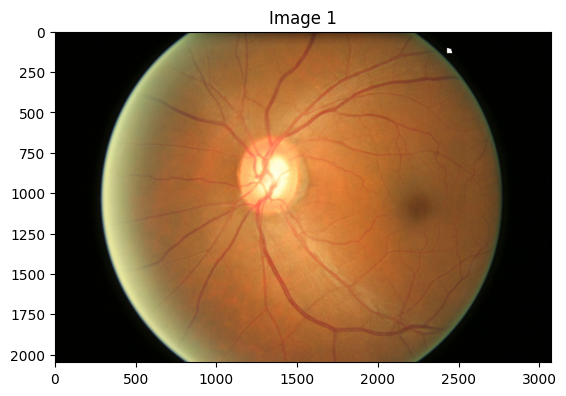

In [13]:
image_index = 1

# Displaying the image
if image_index < len(images):
    selected_image = images[image_index]

    # Convert BGR to RGB
    rgb_image = cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB)

    # Display the RGB image using Matplotlib
    plt.imshow(rgb_image)
    plt.title(f"Image {image_index}")
    plt.show()
else:
    print(f"Image index {image_index} is out of range.")

3 objects were found in this image.


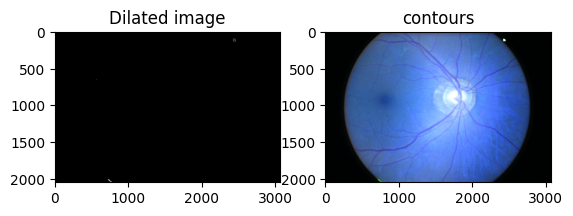

: 

In [28]:

image = cv2.imread("Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/224.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(blurred, 10, 100)

# define a (3, 3) structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# apply the dilation operation to the edged image
dilate = cv2.dilate(edged, kernel, iterations=1)

# find the contours in the dilated image
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")


plt.subplot(1, 2, 1)
plt.imshow(dilate, cmap='gray')
plt.title("Dilated image")


plt.subplot(1, 2, 2) 
plt.imshow(image_copy, cmap='gray')  
plt.title("contours")

plt.show()


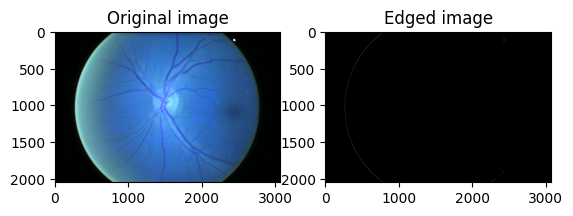

In [19]:
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")


255 objects were found in this image.


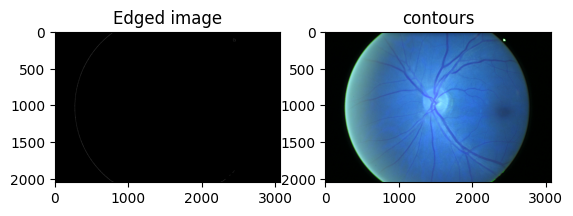

In [20]:

plt.subplot(1, 2, 1)
plt.imshow(edged, cmap='gray')
plt.title("Edged image")


plt.subplot(1, 2, 2) 
plt.imshow(image_copy, cmap='gray')  
plt.title("contours")

plt.show()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Setting up the data 

In [4]:
import cv2
import os
from sklearn.model_selection import train_test_split

# Define the image dimensions
image_width, image_height = 224, 224

# Paths to your class folders
glaucoma_positive_path = r'C:\Users\Varrun\Desktop\Projects\AP research project\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Negative'
glaucoma_negative_path = r'C:\Users\Varrun\Desktop\Projects\AP research project\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Positive'

# List of image file paths for each class
glaucoma_positive_files = [os.path.join(glaucoma_positive_path, filename) for filename in os.listdir(glaucoma_positive_path)]
glaucoma_negative_files = [os.path.join(glaucoma_negative_path, filename) for filename in os.listdir(glaucoma_negative_path)]

# Load and preprocess the images
images = []
labels = []

for image_file in glaucoma_positive_files:
    image = cv2.imread(image_file)
    
    # Resize the image to a common size
    image = cv2.resize(image, (image_width, image_height))
    
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    
    images.append(image)
    labels.append('glaucoma')  # or any label you choose for glaucoma-positive class

for image_file in glaucoma_negative_files:
    image = cv2.imread(image_file)
    
    # Resize the image to a common size
    image = cv2.resize(image, (image_width, image_height))
    
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    
    images.append(image)
    labels.append('non_glaucoma')  # or any label you choose for glaucoma-negative class

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
